# Shallow Water

## Model Reconstruction

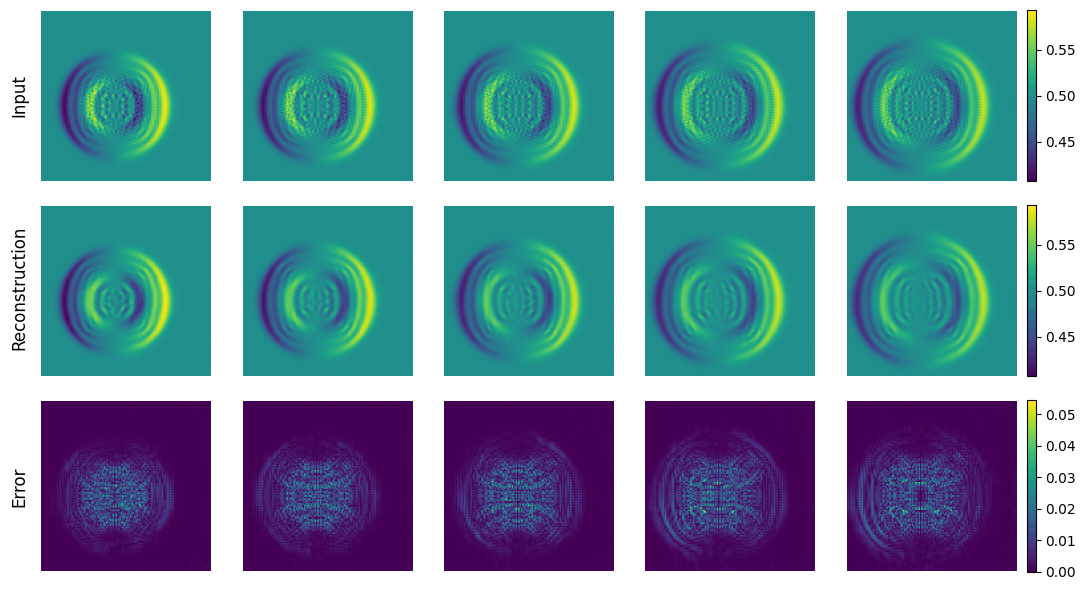

In [21]:
from data.dataset import ShallowWaterDataset
from models.timae.pl_model import LitTiMAE
import matplotlib.pyplot as plt
import torch

dataset = ShallowWaterDataset(dilation=3)
model = LitTiMAE.load_from_checkpoint('logs/timae/dilation3/lightning_logs/version_0/checkpoints/epoch=34-step=82950.ckpt', map_location='cpu', dataset=dataset)

x, y, mask, _ = dataset[10]
pred = model.model(x.unsqueeze(0), mask.unsqueeze(0))[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 1]
reconstructions = pred[10:, 1]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sw_reconstruction.pdf', bbox_inches='tight', dpi=100)

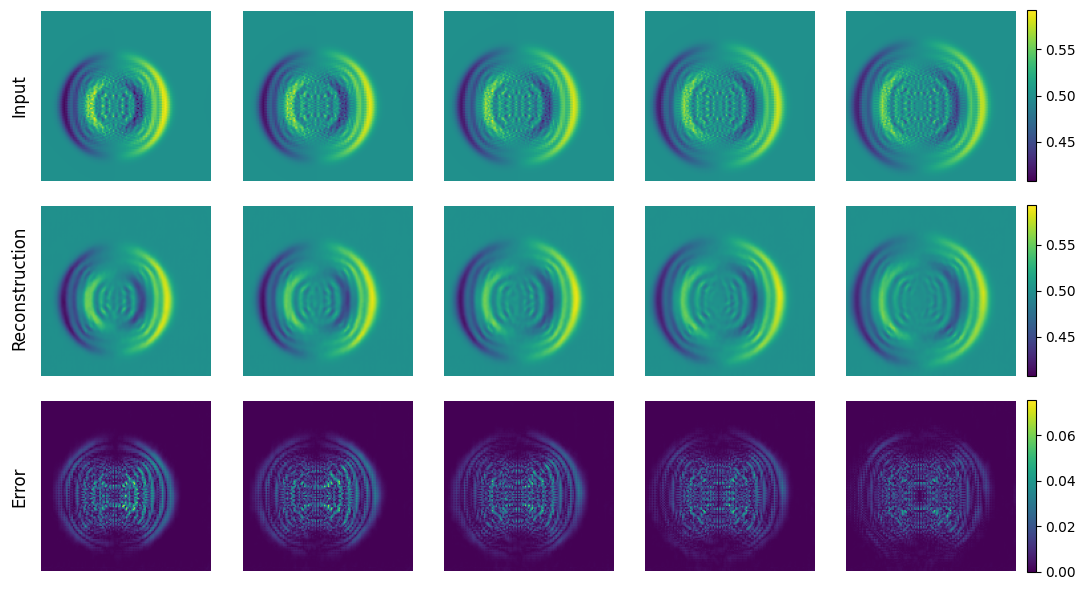

In [2]:
from data.dataset import ShallowWaterDataset
from data.utils import interpolate_sequence
from models.convrae.pl_model import LitConvRAE
import matplotlib.pyplot as plt
import torch

dataset = ShallowWaterDataset(dilation=3)
model = LitConvRAE.load_from_checkpoint('logs/convrae/dilation3/lightning_logs/version_0/checkpoints/epoch=34-step=82950.ckpt', map_location='cpu', dataset=dataset)

x, y, mask, _ = dataset[10]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 1]
reconstructions = pred[10:, 1]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sw_reconstruction_convrae.pdf', bbox_inches='tight', dpi=100)

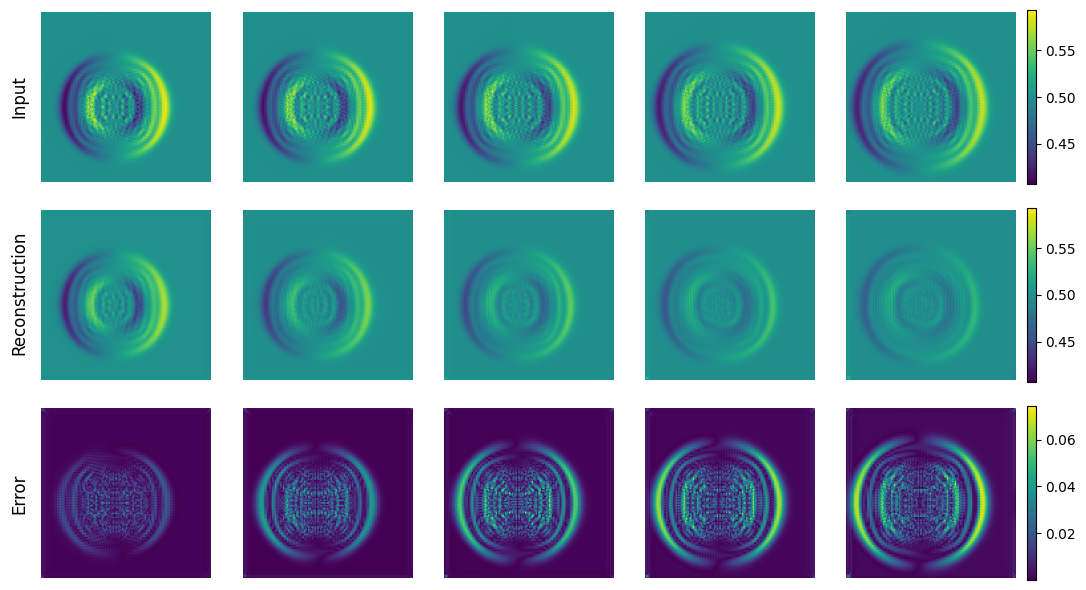

In [3]:
from data.dataset import ShallowWaterDataset
from data.utils import interpolate_sequence
from models.convlstm.pl_model import LitConvLSTM
import matplotlib.pyplot as plt
import torch

dataset = ShallowWaterDataset(dilation=3)
model = LitConvLSTM.load_from_checkpoint('logs/convlstm/dilation3/lightning_logs/version_0/checkpoints/epoch=34-step=82950.ckpt', map_location='cpu', dataset=dataset)

x, y, mask, _ = dataset[10]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 1]
reconstructions = pred[10:, 1]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sw_reconstruction_convlstm.pdf', bbox_inches='tight', dpi=100)

## CAE Evaluation

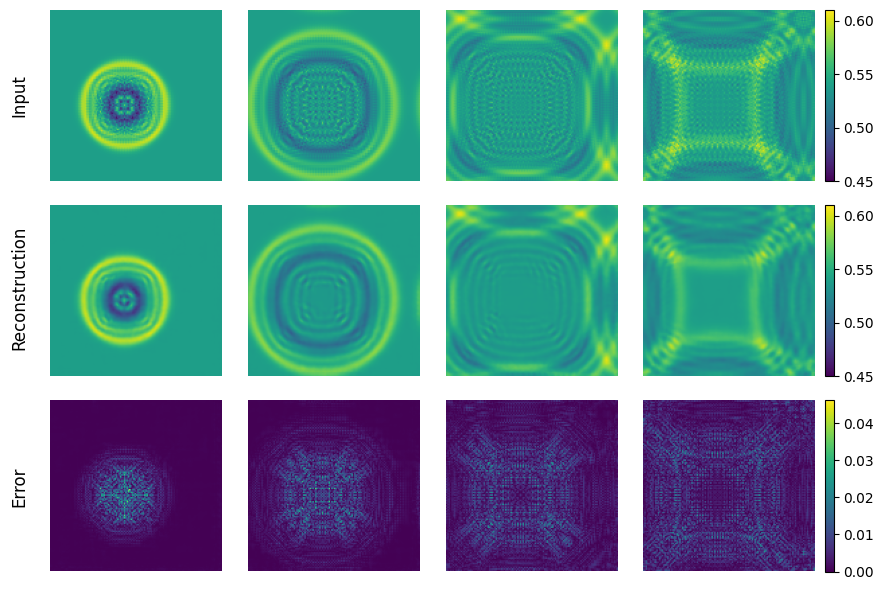

In [1]:
from data.dataset import ShallowWaterDataset
from models.autoencoder.pl_model import LitAutoEncoder
import matplotlib.pyplot as plt
import torch

dataset = ShallowWaterDataset(1, 0, 0, 1)
model = LitAutoEncoder.load_from_checkpoint('logs/autoencoder/shallow_water.ckpt', map_location='cpu', dataset=dataset)

ids = [30, 60, 90, 120]

fig, axs = plt.subplots(3, 5, figsize=(9, 6), gridspec_kw={'width_ratios': [0.1, 1, 1, 1, 1.21]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')
for j in range(3):
    axs[j, 0].axis('off')

for i in range(4):
    image = dataset[ids[i]][0][0]
    reconstruction = model.model(image.unsqueeze(0).unsqueeze(0))[0].squeeze().detach()
    diff = torch.abs(image - reconstruction)

    im1 = axs[0, i+1].imshow(image[0], vmin=0.45, vmax=0.61)
    im2 = axs[1, i+1].imshow(reconstruction[0], vmin=0.45, vmax=0.61)
    im3 = axs[2, i+1].imshow(diff[0], vmin=0, vmax=0.0462)

    for j in range(3):
        axs[j, i+1].axis('off')

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

plt.tight_layout()
plt.savefig('sw_cae_evaluation.pdf', bbox_inches='tight', dpi=100)

## Model Comparison

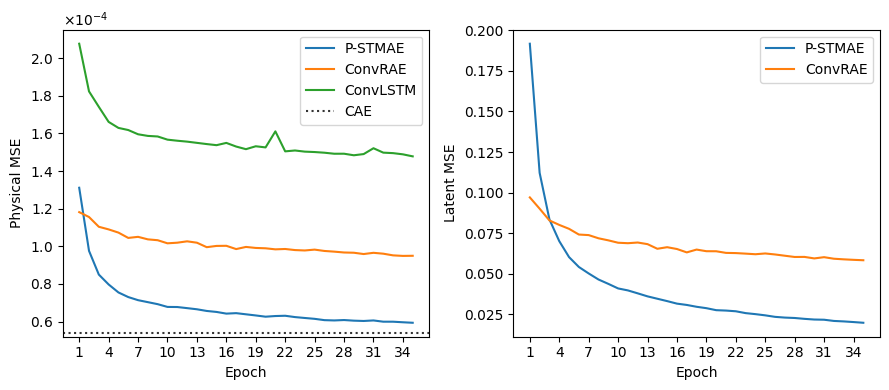

In [2]:
import os
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter


# Load TensorBoard log data
all_stats = {}
for model in ['timae', 'convrae', 'convlstm']:
    stats = {
        'val/mse': {'steps': [], 'values': []},
        'val/latent_mse': {'steps': [], 'values': []},
    }
    # Load the data from multiple runs
    for ver_name in os.listdir(f"logs/{model}/dilation3/lightning_logs"):
        event_acc = event_accumulator.EventAccumulator(f"logs/{model}/dilation3/lightning_logs/{ver_name}")
        event_acc.Reload()
        for stat in stats.keys():
            if model == 'convlstm' and 'latent' in stat:
                continue
            steps = [event.step for event in event_acc.Scalars(stat)]
            values = [event.value for event in event_acc.Scalars(stat)]
            stats[stat]['steps'].append(steps)
            stats[stat]['values'].append(values)
    # convert to numpy arrays
    for stat in stats.keys():
        stats[stat]['steps'] = np.array(stats[stat]['steps'])
        stats[stat]['values'] = np.array(stats[stat]['values'])
    all_stats[model] = stats

event_acc = event_accumulator.EventAccumulator(f"logs/autoencoder/lightning_logs/prod")
event_acc.Reload()
ae_metric = lambda x: event_acc.Scalars(x)[-1].value

model_name = {'timae': 'P-STMAE', 'convrae': 'ConvRAE', 'convlstm': 'ConvLSTM'}


fig = plt.figure(figsize=(9, 4))
gs = gridspec.GridSpec(1, 2, height_ratios=[1])

ax, stat = fig.add_subplot(gs[0, 0]), 'val/mse'
max_steps = max([all_stats[model][stat]['steps'][0][-1] for model in all_stats.keys()])
for j, model in enumerate(all_stats.keys()):
    # Extract mean and std
    steps = all_stats[model][stat]['steps'][0]
    mean_values = np.mean(all_stats[model][stat]['values'], axis=0)
    std_values = np.std(all_stats[model][stat]['values'], axis=0)

    # Visualize the data
    ax.plot(steps, mean_values, label=model_name[model])
ax.axhline(ae_metric(stat), linestyle=':', color='black', alpha=0.8,  label='CAE')
ax.set_xticks(steps[::3], ((steps + 1) // 2370)[::3])
ax.set_xlabel('Epoch')
ax.set_ylabel('Physical MSE')
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-4, 4))
ax.yaxis.set_major_formatter(formatter)
ax.legend()

ax, stat = fig.add_subplot(gs[0, 1]), 'val/latent_mse'
max_steps = max([all_stats[model][stat]['steps'][0][-1] for model in ['timae', 'convrae']])
for j, model in enumerate(['timae', 'convrae']):
    # Extract mean and std
    steps = all_stats[model][stat]['steps'][0]
    mean_values = np.mean(all_stats[model][stat]['values'], axis=0)
    std_values = np.std(all_stats[model][stat]['values'], axis=0)

    # Visualize the data
    ax.plot(steps, mean_values, label=model_name[model])
ax.set_xticks(steps[::3], ((steps + 1) // 2370)[::3])
ax.set_xlabel('Epoch')
ax.set_ylabel('Latent MSE')
ax.legend()

plt.tight_layout()
plt.savefig('sw_comparison.pdf', bbox_inches='tight', dpi=100)

## Missing Ratio Analysis

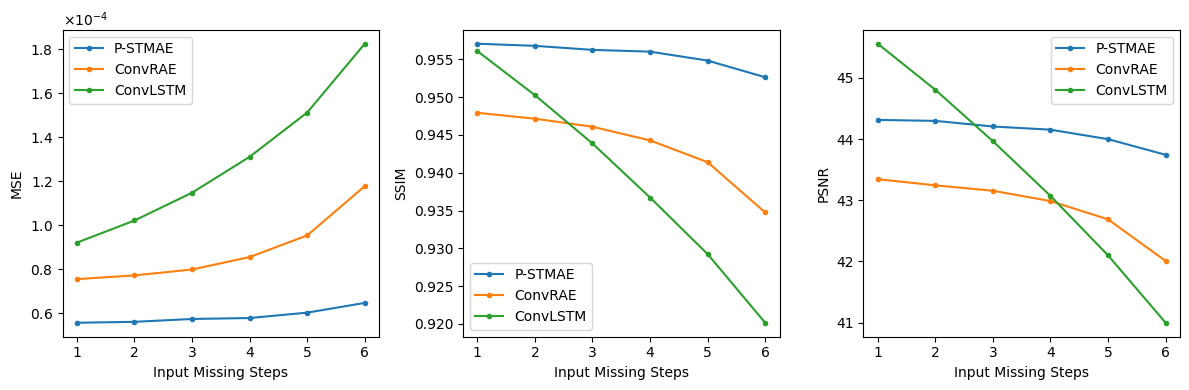

In [3]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter


mask_nums = [1, 2, 3, 4, 5, 6]

# Load TensorBoard log data
all_stats = {}
for model in ['timae', 'convrae', 'convlstm']:
    stats = {
        'test/mse': [],
        'test/ssim': [],
        'test/psnr': [],
    }
    # Load the data from multiple runs
    for mask_num in mask_nums:
        for ver_name in os.listdir(f"logs/{model}/eval_d3_mask{mask_num}/lightning_logs"):
            event_acc = event_accumulator.EventAccumulator(f"logs/{model}/eval_d3_mask{mask_num}/lightning_logs/{ver_name}")
            event_acc.Reload()
            for stat in stats.keys():
                stats[stat].append(event_acc.Scalars(stat)[-1].value)
    all_stats[model] = stats

model_name = {'timae': 'P-STMAE', 'convrae': 'ConvRAE', 'convlstm': 'ConvLSTM'}


fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, height_ratios=[1])

ax, stat = fig.add_subplot(gs[0, 0]), 'test/mse'
for j, model in enumerate(all_stats.keys()):
    ax.plot(mask_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(mask_nums)
ax.set_xlabel('Input Missing Steps')
ax.set_ylabel('MSE')
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-4, 4))
ax.yaxis.set_major_formatter(formatter)
ax.legend()

ax, stat = fig.add_subplot(gs[0, 1]), 'test/ssim'
for j, model in enumerate(all_stats.keys()):
    ax.plot(mask_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(mask_nums)
ax.set_xlabel('Input Missing Steps')
ax.set_ylabel('SSIM')
ax.legend()

ax, stat = fig.add_subplot(gs[0, 2]), 'test/psnr'
for j, model in enumerate(all_stats.keys()):
    ax.plot(mask_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(mask_nums)
ax.set_xlabel('Input Missing Steps')
ax.set_ylabel('PSNR')
ax.legend()

plt.tight_layout()
plt.savefig('sw_missing_ratio.pdf', bbox_inches='tight', dpi=100)

## Non-linear Robustness Analysis

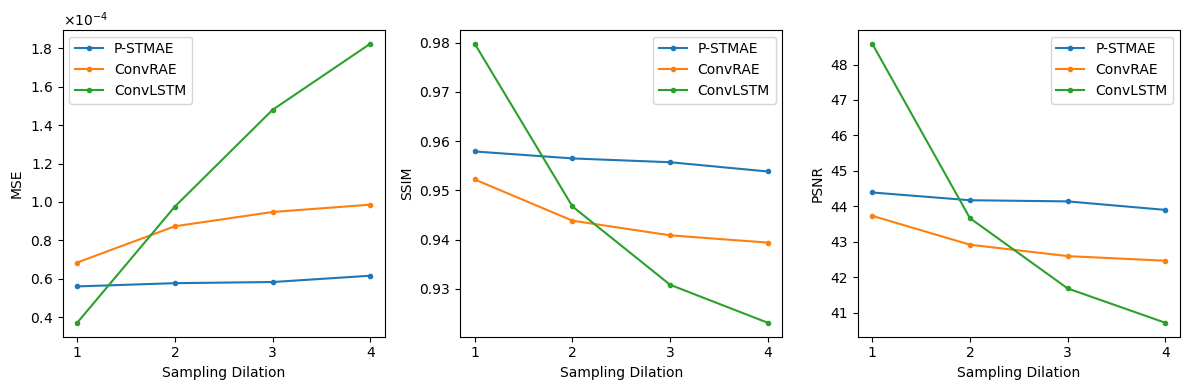

In [4]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter


dilation_nums = [1, 2, 3, 4]

# Load TensorBoard log data
all_stats = {}
for model in ['timae', 'convrae', 'convlstm']:
    stats = {
        'test/mse': [],
        'test/ssim': [],
        'test/psnr': [],
    }
    # Load the data from multiple runs
    for dilation_num in dilation_nums:
        for ver_name in os.listdir(f"logs/{model}/dilation{dilation_num}/lightning_logs"):
            event_acc = event_accumulator.EventAccumulator(f"logs/{model}/dilation{dilation_num}/lightning_logs/{ver_name}")
            event_acc.Reload()
            for stat in stats.keys():
                stats[stat].append(event_acc.Scalars(stat)[-1].value)
    all_stats[model] = stats

model_name = {'timae': 'P-STMAE', 'convrae': 'ConvRAE', 'convlstm': 'ConvLSTM'}


fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, height_ratios=[1])

ax, stat = fig.add_subplot(gs[0, 0]), 'test/mse'
for j, model in enumerate(all_stats.keys()):
    ax.plot(dilation_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(dilation_nums)
ax.set_xlabel('Sampling Dilation')
ax.set_ylabel('MSE')
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-4, 4))
ax.yaxis.set_major_formatter(formatter)
ax.legend()

ax, stat = fig.add_subplot(gs[0, 1]), 'test/ssim'
for j, model in enumerate(all_stats.keys()):
    ax.plot(dilation_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(dilation_nums)
ax.set_xlabel('Sampling Dilation')
ax.set_ylabel('SSIM')
ax.legend()

ax, stat = fig.add_subplot(gs[0, 2]), 'test/psnr'
for j, model in enumerate(all_stats.keys()):
    ax.plot(dilation_nums, all_stats[model][stat], label=model_name[model], marker='.')
ax.set_xticks(dilation_nums)
ax.set_xlabel('Sampling Dilation')
ax.set_ylabel('PSNR')
ax.legend()

plt.tight_layout()
plt.savefig('sw_dilations.pdf', bbox_inches='tight', dpi=100)

# Diffusion Reaction

## Model Reconstruction

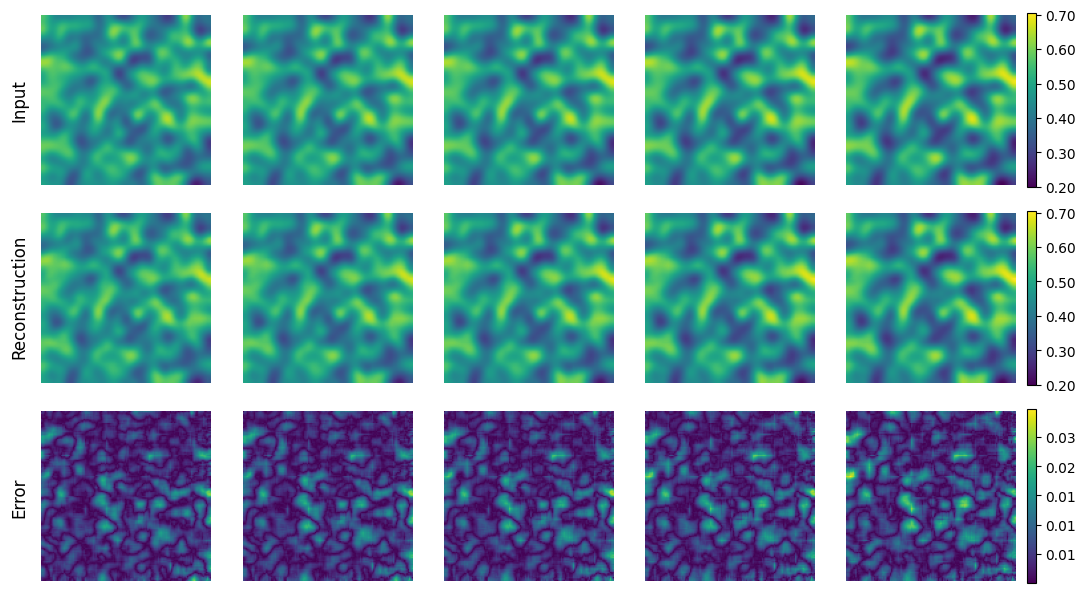

In [17]:
from data.dataset import DiffusionReactionDataset
from models.timae.pl_model import LitTiMAE
import matplotlib.pyplot as plt
import torch

dataset = DiffusionReactionDataset(dilation=5)
model = LitTiMAE.load_from_checkpoint('logs/timae/dilation5/lightning_logs/version_140165/checkpoints/epoch=79-step=60000.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[10]
pred = model.model(x.unsqueeze(0), mask.unsqueeze(0))[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('dr_reconstruction.pdf', bbox_inches='tight', dpi=100)

/vol/bitbucket/yx723/P-STMAE/models/autoencoder/__init__.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(pl_ckpt_path, map_location='cpu')['stat

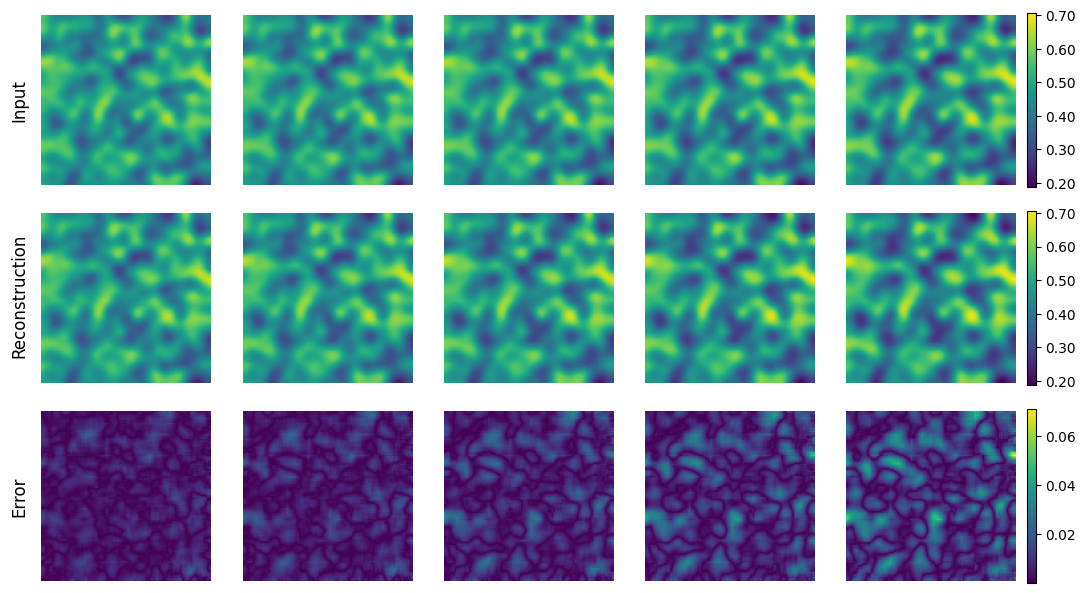

In [1]:
from data.dataset import DiffusionReactionDataset
from data.utils import interpolate_sequence
from models.convrae.pl_model import LitConvRAE
import matplotlib.pyplot as plt
import torch

dataset = DiffusionReactionDataset(dilation=5)
model = LitConvRAE.load_from_checkpoint('logs/convrae/dilation5/lightning_logs/version_140166/checkpoints/epoch=79-step=60000.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[10]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('dr_reconstruction_convrae.pdf', bbox_inches='tight', dpi=100)

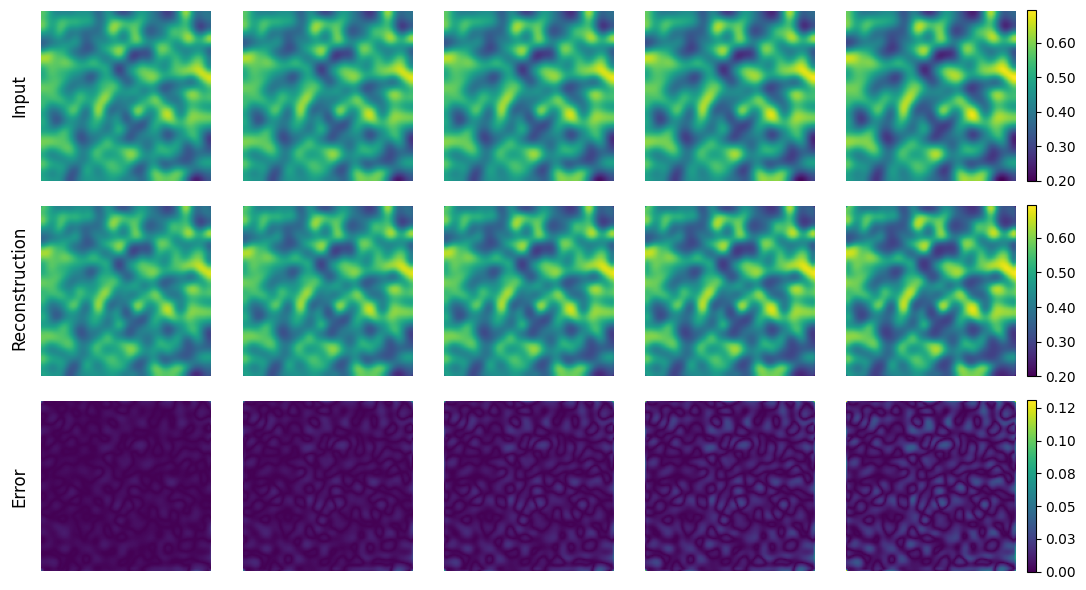

In [3]:
from data.dataset import DiffusionReactionDataset
from data.utils import interpolate_sequence
from models.convlstm.pl_model import LitConvLSTM
import matplotlib.pyplot as plt
import torch

dataset = DiffusionReactionDataset(dilation=5)
model = LitConvLSTM.load_from_checkpoint('logs/convlstm/dilation5/lightning_logs/version_140171/checkpoints/epoch=79-step=60000.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[10]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('dr_reconstruction_convlstm.pdf', bbox_inches='tight', dpi=100)

## Model Comparison

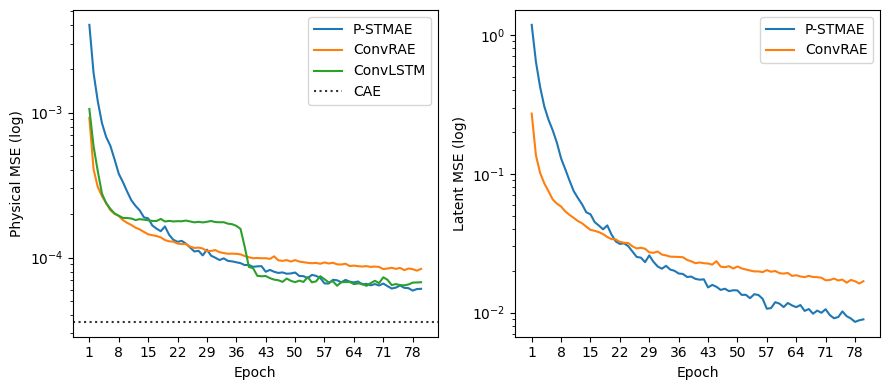

In [ ]:
import os
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Load TensorBoard log data
all_stats = {}
for model in ['timae', 'convrae', 'convlstm']:
    stats = {
        'val/mse': {'steps': [], 'values': []},
        'val/latent_mse': {'steps': [], 'values': []},
    }
    # Load the data from multiple runs
    for ver_name in os.listdir(f"logs/{model}/dilation5/lightning_logs"):
        event_acc = event_accumulator.EventAccumulator(f"logs/{model}/dilation5/lightning_logs/{ver_name}")
        event_acc.Reload()
        for stat in stats.keys():
            if model == 'convlstm' and 'latent' in stat:
                continue
            steps = [event.step for event in event_acc.Scalars(stat)]
            values = [event.value for event in event_acc.Scalars(stat)]
            stats[stat]['steps'].append(steps)
            stats[stat]['values'].append(values)
    # convert to numpy arrays
    for stat in stats.keys():
        stats[stat]['steps'] = np.array(stats[stat]['steps'])
        stats[stat]['values'] = np.array(stats[stat]['values'])
    all_stats[model] = stats

event_acc = event_accumulator.EventAccumulator(f"logs/autoencoder/lightning_logs/diffusion_reaction_2")
event_acc.Reload()
ae_metric = lambda x: event_acc.Scalars(x)[-1].value

model_name = {'timae': 'P-STMAE', 'convrae': 'ConvRAE', 'convlstm': 'ConvLSTM'}


fig = plt.figure(figsize=(9, 4))
gs = gridspec.GridSpec(1, 2, height_ratios=[1])

ax, stat = fig.add_subplot(gs[0, 0]), 'val/mse'
max_steps = max([all_stats[model][stat]['steps'][0][-1] for model in all_stats.keys()])
for j, model in enumerate(all_stats.keys()):
    # Extract mean and std
    steps = all_stats[model][stat]['steps'][0]
    mean_values = np.mean(all_stats[model][stat]['values'], axis=0)
    std_values = np.std(all_stats[model][stat]['values'], axis=0)

    # Visualize the data
    ax.plot(steps, mean_values, label=model_name[model])
ax.axhline(ae_metric(stat), linestyle=':', color='black', alpha=0.8,  label='CAE')
ax.set_yscale('log')
ax.set_xticks(steps[::7], ((steps + 1) // 750)[::7])
ax.set_xlabel('Epoch')
ax.set_ylabel('Physical MSE (log)')
ax.legend()

ax, stat = fig.add_subplot(gs[0, 1]), 'val/latent_mse'
max_steps = max([all_stats[model][stat]['steps'][0][-1] for model in ['timae', 'convrae']])
for j, model in enumerate(['timae', 'convrae']):
    # Extract mean and std
    steps = all_stats[model][stat]['steps'][0]
    mean_values = np.mean(all_stats[model][stat]['values'], axis=0)
    std_values = np.std(all_stats[model][stat]['values'], axis=0)

    # Visualize the data
    ax.plot(steps, mean_values, label=model_name[model])
ax.set_xticks(steps[::7], ((steps + 1) // 750)[::7])
ax.set_yscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Latent MSE (log)')
ax.legend()

plt.tight_layout()
plt.savefig('dr_comparison.pdf', bbox_inches='tight', dpi=100)

# Compressible Navier-Stokes

## Model Reconstruction (Standard)

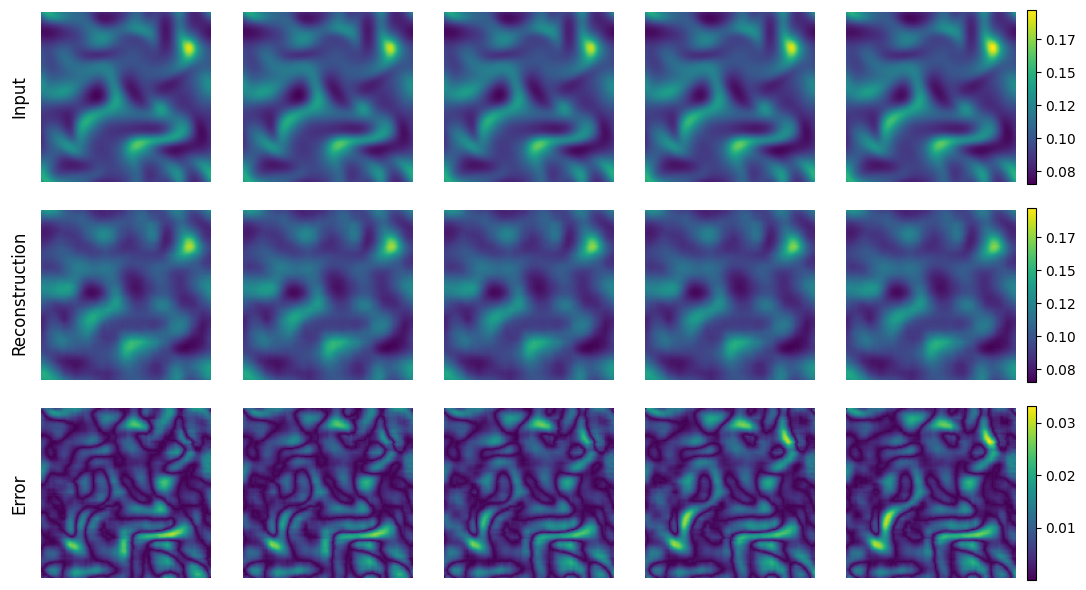

In [21]:
from data.dataset import CompressibleNavierStokesDataset
from models.timae.pl_model import LitTiMAE
import matplotlib.pyplot as plt
import torch

dataset = CompressibleNavierStokesDataset()
model = LitTiMAE.load_from_checkpoint('logs/timae/lightning_logs/version_124930/checkpoints/epoch=39-step=78760.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[500]
pred = model.model(x.unsqueeze(0), mask.unsqueeze(0))[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 2]
reconstructions = pred[10:, 2]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('cns_std_reconstruction.pdf', bbox_inches='tight', dpi=100)

/vol/bitbucket/yx723/P-STMAE/models/autoencoder/__init__.py:86: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(pl_ckpt_path, map_location='cpu')['stat

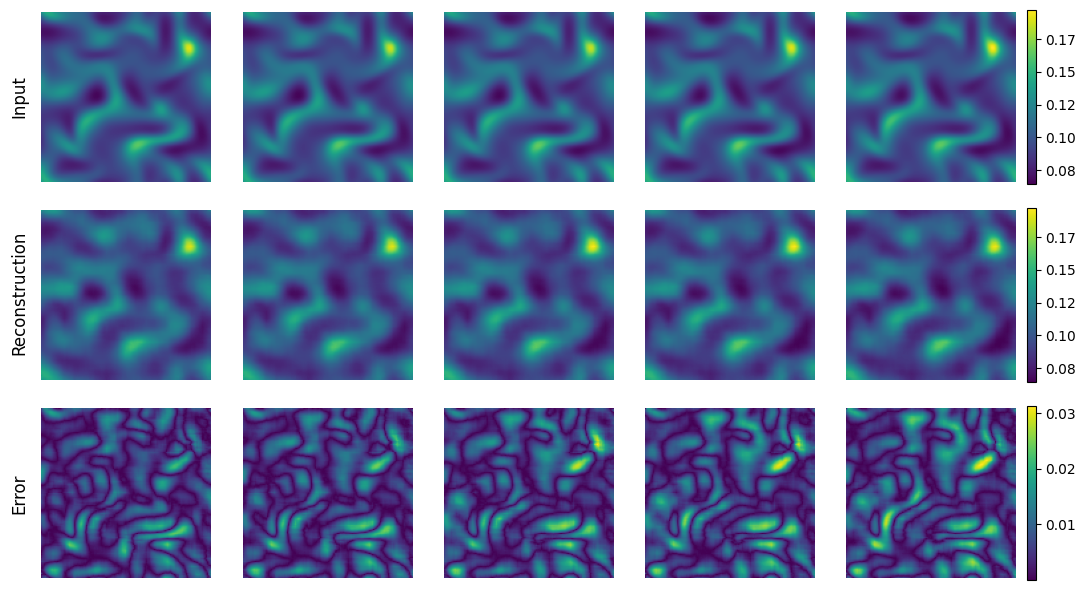

In [1]:
from data.dataset import CompressibleNavierStokesDataset
from data.utils import interpolate_sequence
from models.convrae.pl_model import LitConvRAE
import matplotlib.pyplot as plt
import torch

dataset = CompressibleNavierStokesDataset()
model = LitConvRAE.load_from_checkpoint('logs/convrae/lightning_logs/version_124931/checkpoints/epoch=19-step=39380.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[500]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 2]
reconstructions = pred[10:, 2]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('cns_std_reconstruction_convrae.pdf', bbox_inches='tight', dpi=100)

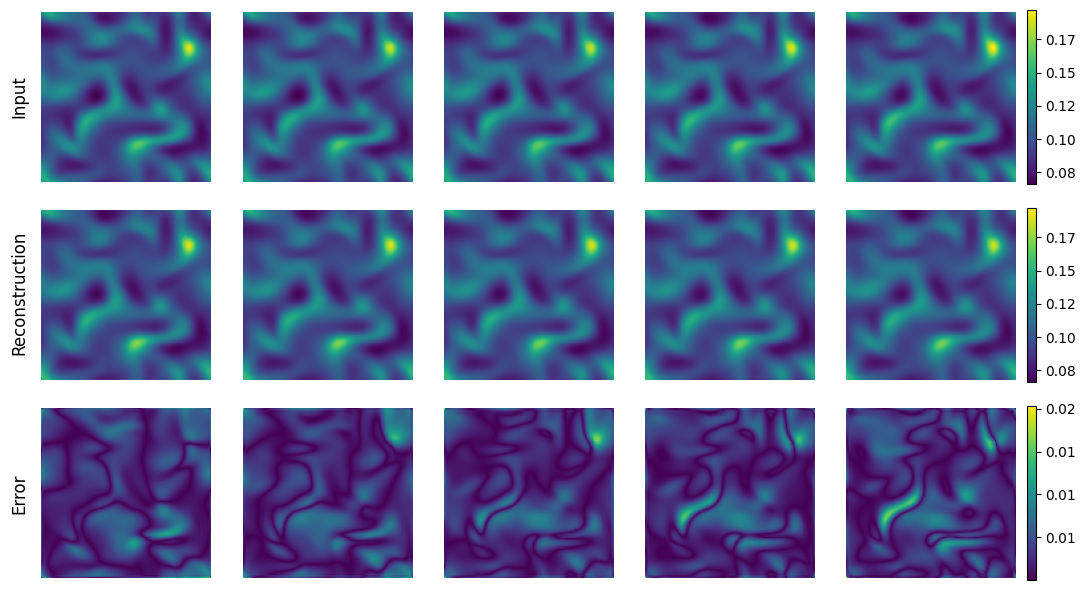

In [2]:
from data.dataset import CompressibleNavierStokesDataset
from data.utils import interpolate_sequence
from models.convlstm.pl_model import LitConvLSTM
import matplotlib.pyplot as plt
import torch

dataset = CompressibleNavierStokesDataset()
model = LitConvLSTM.load_from_checkpoint('logs/convlstm/lightning_logs/version_124932/checkpoints/epoch=19-step=39380.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[500]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach()

fig, axs = plt.subplots(3, 6, figsize=(11, 6), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.4, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.18, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.4, s='Error', fontsize='large', rotation='vertical')

images = y[:, 2]
reconstructions = pred[10:, 2]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('cns_std_reconstruction_convlstm.pdf', bbox_inches='tight', dpi=100)

# NOAA Sea Surface Temperature

## Model Reconstruction

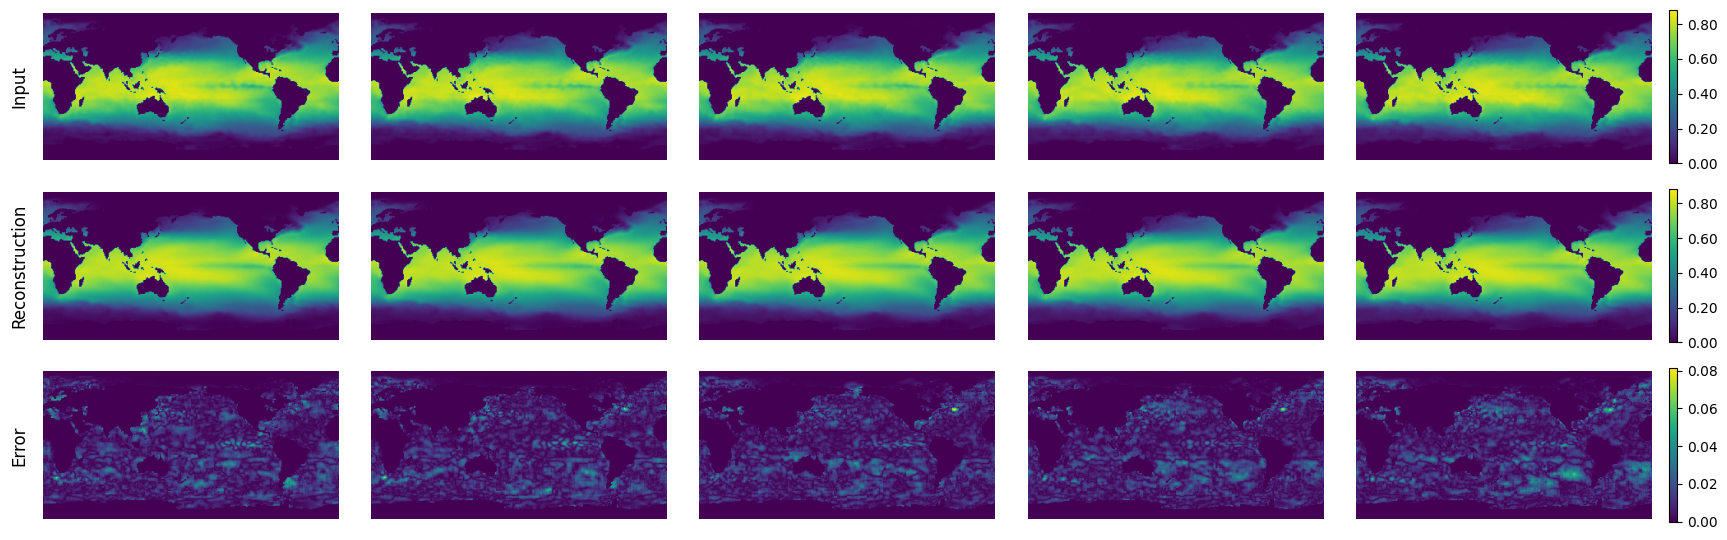

In [5]:
from data.dataset import NOAASeaSurfaceTemperatureDataset
from models.timae.pl_model import LitTiMAE
import matplotlib.pyplot as plt
import torch

dataset = NOAASeaSurfaceTemperatureDataset()
model = LitTiMAE.load_from_checkpoint('logs/timae/lightning_logs/heads8_depth8/checkpoints/epoch=69-step=3780.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[100]
pred = model.model(x.unsqueeze(0), mask.unsqueeze(0))[0].squeeze(0).detach() * model.data_mask

fig, axs = plt.subplots(3, 6, figsize=(17.5, 5.5), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.39, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.12, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.39, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sst_reconstruction.pdf', bbox_inches='tight', dpi=100)

/vol/bitbucket/yx723/P-STMAE/models/autoencoder/__init__.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(pl_ckpt_path, map_location='cpu')['stat

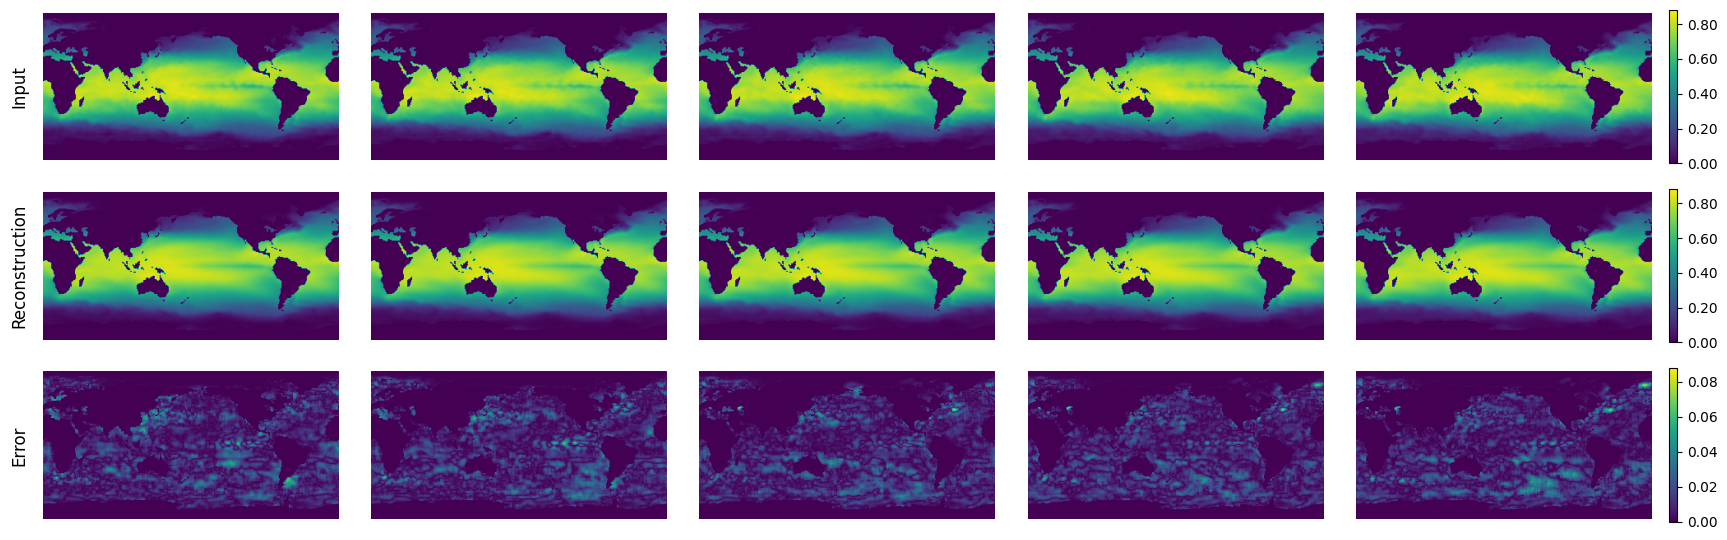

In [1]:
from data.dataset import NOAASeaSurfaceTemperatureDataset
from data.utils import interpolate_sequence
from models.convrae.pl_model import LitConvRAE
import matplotlib.pyplot as plt
import torch

dataset = NOAASeaSurfaceTemperatureDataset()
model = LitConvRAE.load_from_checkpoint('logs/convrae/lightning_logs/version_0/checkpoints/epoch=19-step=1080.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[100]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach() * model.data_mask

fig, axs = plt.subplots(3, 6, figsize=(17.5, 5.5), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.39, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.12, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.39, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sst_reconstruction_convrae.pdf', bbox_inches='tight', dpi=100)

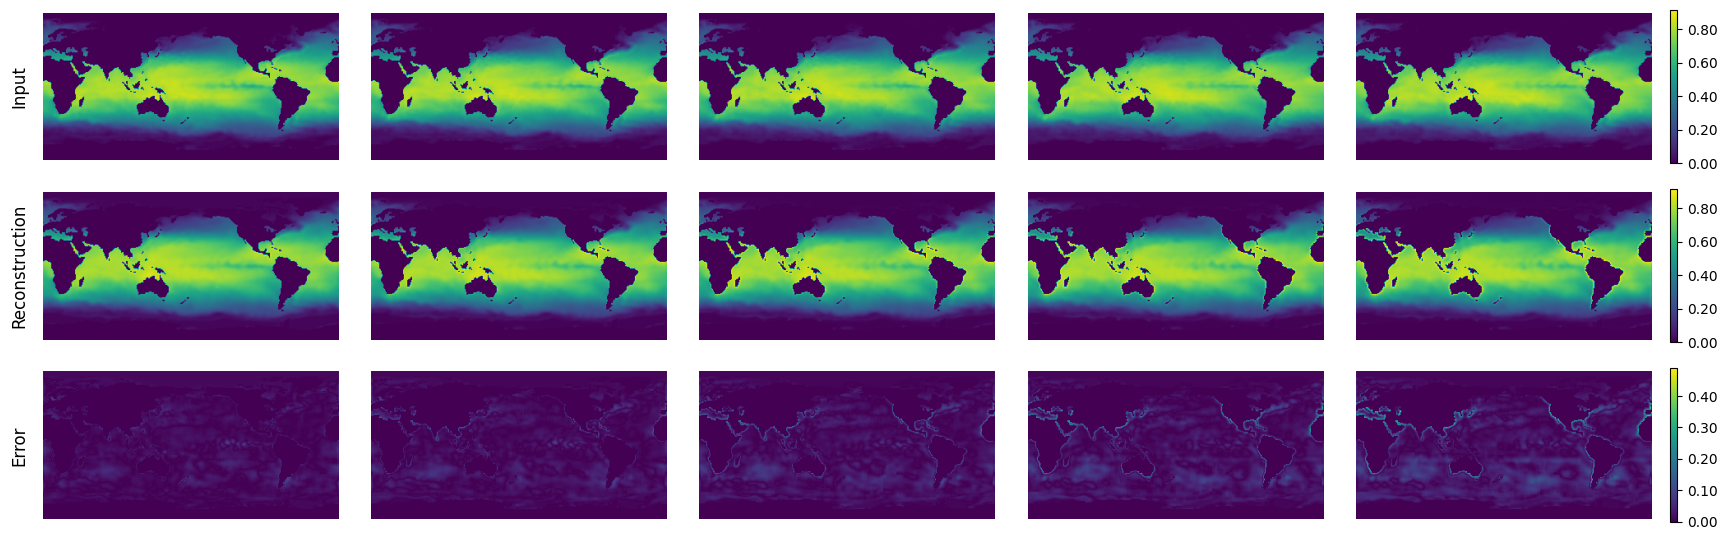

In [2]:
from data.dataset import NOAASeaSurfaceTemperatureDataset
from data.utils import interpolate_sequence
from models.convlstm.pl_model import LitConvLSTM
import matplotlib.pyplot as plt
import torch

dataset = NOAASeaSurfaceTemperatureDataset()
model = LitConvLSTM.load_from_checkpoint('logs/convlstm/lightning_logs/version_122943/checkpoints/epoch=69-step=3780.ckpt', map_location='cpu', dataset=dataset)

x, y, mask = dataset[100]
x = interpolate_sequence(x, mask)
pred = model.model.predict(x.unsqueeze(0), 5)[0].squeeze(0).detach() * model.data_mask

fig, axs = plt.subplots(3, 6, figsize=(17.5, 5.5), gridspec_kw={'width_ratios': [0, 1, 1, 1, 1, 1.25]})

axs[0, 0].text(x=0, y=0.39, s='Input', fontsize='large', rotation='vertical')
axs[1, 0].text(x=0, y=0.12, s='Reconstruction', fontsize='large', rotation='vertical')
axs[2, 0].text(x=0, y=0.39, s='Error', fontsize='large', rotation='vertical')

images = y[:, 0]
reconstructions = pred[10:, 0]
diffs = torch.abs(images - reconstructions)
i_vmin, i_vmax = torch.cat([images, reconstructions]).min(), torch.cat([images, reconstructions]).max()
for i in range(5):
    im1 = axs[0, i+1].imshow(images[i], vmin=i_vmin, vmax=i_vmax)
    im2 = axs[1, i+1].imshow(reconstructions[i], vmin=i_vmin, vmax=i_vmax)
    im3 = axs[2, i+1].imshow(diffs[i], vmin=diffs.min(), vmax=diffs.max())

fig.colorbar(im1, ax=axs[0, i+1], shrink=1, format='%.2f')
fig.colorbar(im2, ax=axs[1, i+1], shrink=1, format='%.2f')
fig.colorbar(im3, ax=axs[2, i+1], shrink=1, format='%.2f')

for i in range(3):
    for j in range(6):
        axs[i, j].axis('off')

plt.tight_layout()
plt.savefig('sst_reconstruction_convlstm.pdf', bbox_inches='tight', dpi=100)

# Energy Conservation

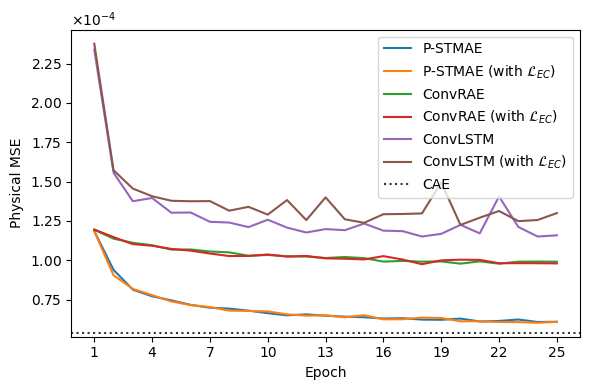

In [4]:
import numpy as np
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter

logdir = "/homes/yx723/b/logs/logs-sw_res128_2"
logdict = {
    'timae': ['dilation3_e0', 'dilation3_e0.1'],
    'convrae': ['dilation3_e0', 'dilation3_e0.1'],
    'convlstm': ['dilation3_e0_l2', 'dilation3_e0.1_l2'],
}


# Load TensorBoard log data
all_stats = {}
for model in ['timae', 'convrae', 'convlstm']:
    stats = {
        'val/mse': {'steps': [], 'values': []},
    }
    # Load the data from multiple runs
    for ver_name in logdict[model]:
        event_acc = event_accumulator.EventAccumulator(f"{logdir}/{model}/lightning_logs/{ver_name}")
        event_acc.Reload()
        for stat in stats.keys():
            steps = [event.step for event in event_acc.Scalars(stat)]
            values = [event.value for event in event_acc.Scalars(stat)]
            stats[stat]['steps'].append(steps)
            stats[stat]['values'].append(values)
    # convert to numpy arrays
    for stat in stats.keys():
        stats[stat]['steps'] = np.array(stats[stat]['steps'])
        stats[stat]['values'] = np.array(stats[stat]['values'])
    all_stats[model] = stats

event_acc = event_accumulator.EventAccumulator(f"{logdir}/autoencoder/lightning_logs/version_2")
event_acc.Reload()
ae_metric = lambda x: event_acc.Scalars(x)[-1].value

model_name = {'timae': 'P-STMAE', 'convrae': 'ConvRAE', 'convlstm': 'ConvLSTM'}


fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(1, 1, height_ratios=[1])

ax, stat = fig.add_subplot(gs[0, 0]), 'val/mse'
steps = all_stats['convrae'][stat]['steps'][0]
for j, model in enumerate(all_stats.keys()):
    ax.plot(steps, all_stats[model][stat]['values'][0][:len(steps)], label=model_name[model])
    ax.plot(steps, all_stats[model][stat]['values'][1][:len(steps)], label=model_name[model]+' (with $\\mathcal{L}_{EC}$)')
ax.axhline(ae_metric(stat), linestyle=':', color='black', alpha=0.8,  label='CAE')
ax.set_xticks(steps[::3], ((steps + 1) // 2667)[::3])
ax.set_xlabel('Epoch')
ax.set_ylabel('Physical MSE')
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-4, 4))
ax.yaxis.set_major_formatter(formatter)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('pc_energy.pdf', bbox_inches='tight', dpi=100)